## (ACMEGRADE INTERNSHIP)

## Name : Dhanshree Bhimsing Rajput

## Batch: Data Science(Self paced) December'23

## Project2 Name : Car Price Prediction

    

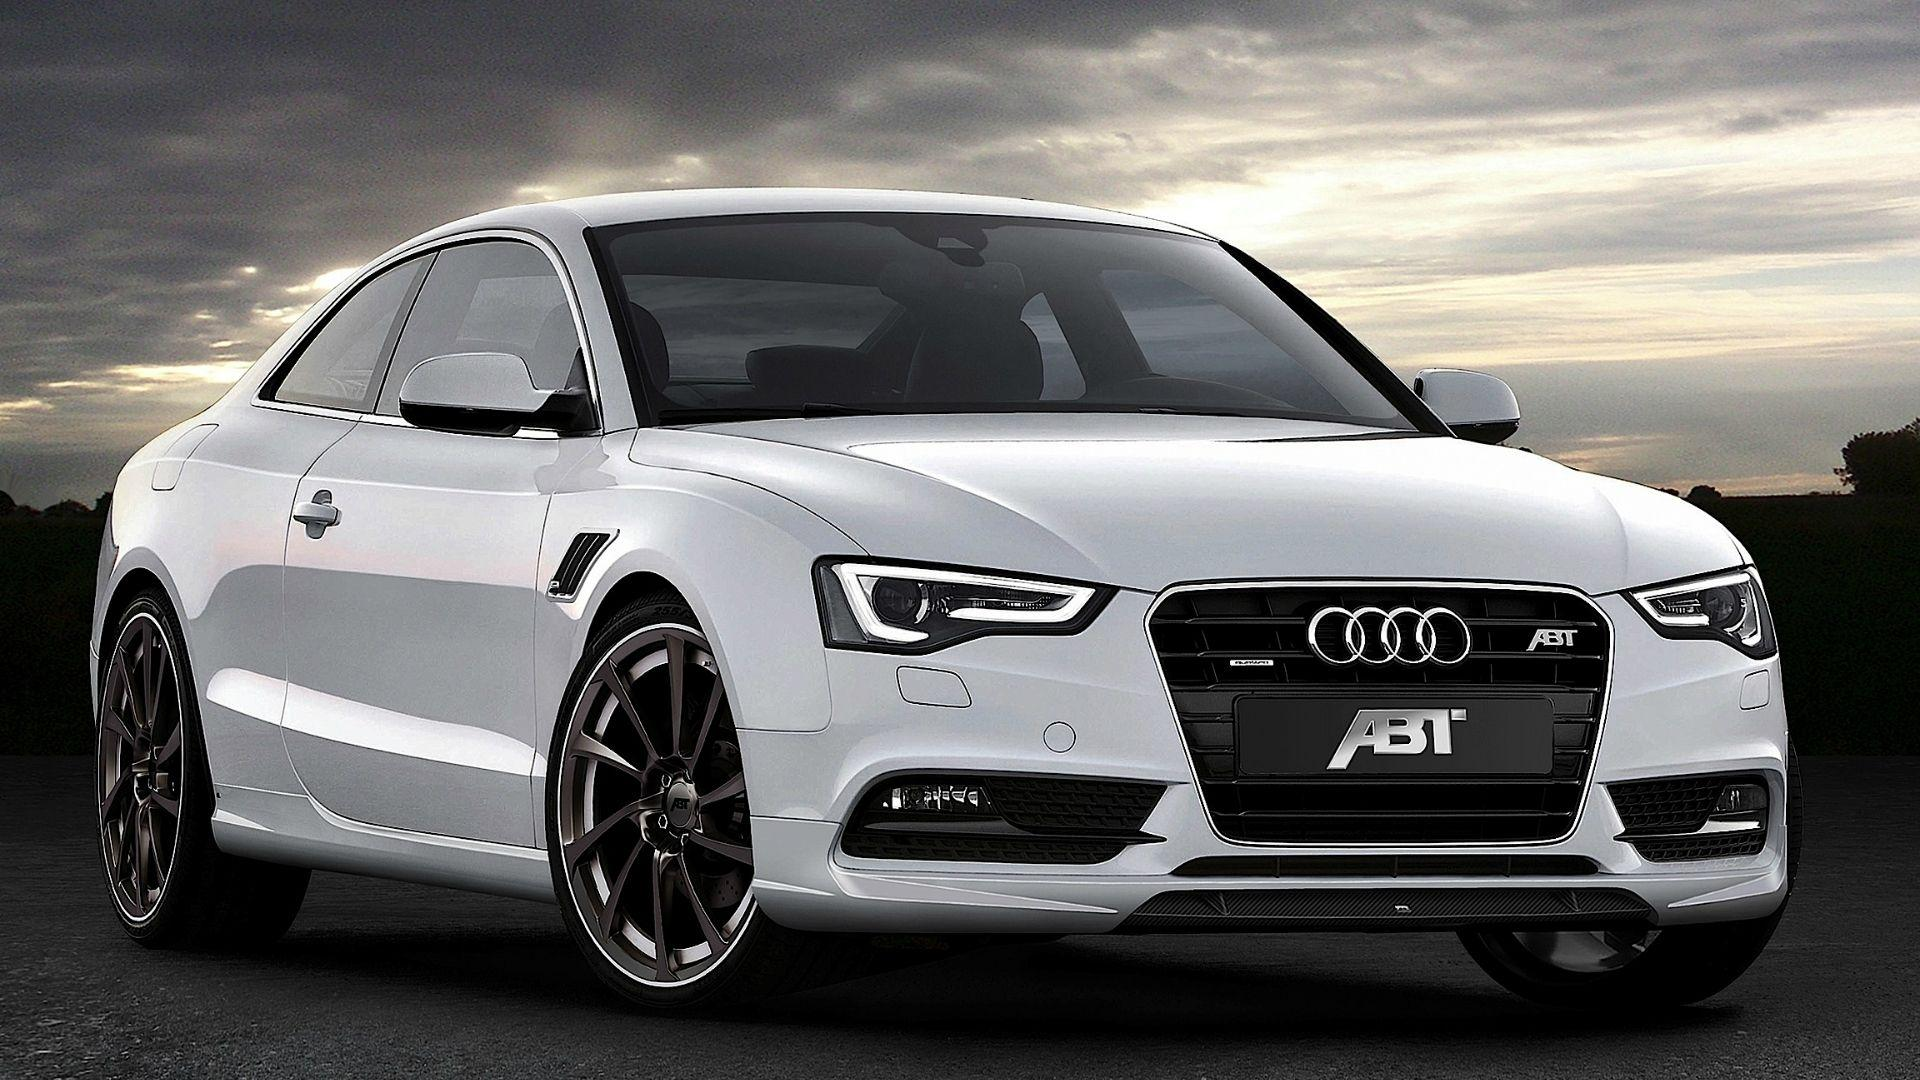

### Summary :

Certainly! In this code, we have performed the following tasks:

1. **Data Loading and Inspection**: Loaded the dataset "audi.csv" and performed exploratory data analysis (EDA) to understand basic statistics, information about the dataset, and check for missing values.

2. **Feature Selection and Preprocessing**: Selected relevant features for the prediction task and handled categorical variables using label encoding and one-hot encoding.

3. **Splitting Data and Feature Scaling**: Split the dataset into training and testing sets, and performed feature scaling using StandardScaler.

4. **Model Selection and Training**: Selected multiple regression models (Random Forest, Linear Regression, CatBoost), performed hyperparameter tuning for Random Forest using RandomizedSearchCV, and trained the models on the training data.

5. **Model Evaluation**: Evaluated the performance of each model using metrics such as R2 Score, Mean Absolute Error, and Mean Squared Error on the testing data.

6. **Model Saving and Loading**: Saved the best Random Forest model to a file using pickle and loaded the saved model from the file.

7. **Example Prediction**: Made an example prediction using the loaded model on a sample data point.

8. **Saving Model to Disk**: Saved a model to a file named 'deploy_GB.pkl' using pickle.

Overall, the code demonstrates the process of building, training, evaluating, and deploying machine learning models for predicting car prices based on various features.

#### install the following libraries


In [1]:
pip install pandas-profiling

In [3]:
pip install catboost

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


#### Import Libraries 

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
import pickle


##### Check Current Directory 



In [117]:
print (os.getcwd())

D:\Acmegrade (Internship)\Dec 23 DS Day 18 Project-20240214T033544Z-001\Dec 23 DS Day 18 Project\Projects\PRJ Car Price Prediction


##### Change the directory 

In [118]:
os.chdir('D:\Acmegrade (Internship)\Dec 23 DS Day 18 Project-20240214T033544Z-001\Dec 23 DS Day 18 Project\Projects\PRJ Car Price Prediction')

print(os.getcwd())

D:\Acmegrade (Internship)\Dec 23 DS Day 18 Project-20240214T033544Z-001\Dec 23 DS Day 18 Project\Projects\PRJ Car Price Prediction


##### Load the dataset

In [119]:
df = pd.read_csv("audi.csv")

df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


##### Pandas Profiling Report 

In [120]:
import pandas_profiling as pf
display(pf.ProfileReport(df))


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Exploratory Data Analysis (EDA)

#### Number of records

In [121]:
print (len(df))

10668


#### display shape

In [122]:
display (df.shape)

(10668, 9)

#### Checking the data types

In [123]:
display (df.dtypes )

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

#### check null values

In [124]:
display (df.isna().sum() )

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

#### Dataset details

In [125]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


#### Describe the dataset

In [126]:
display (df.describe ())

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


#### Create X

In [127]:
X = df.iloc[:,[0,1,3,4,5,6,7,8]].values
display (X.shape)
display (X)


(10668, 8)

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

#### Create Y

In [128]:
Y = df.iloc[:,[2]].values
display (Y.shape)
display (Y)


(10668, 1)

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

#### display top 5  X variables

In [129]:
display(pd.DataFrame(X).head(5))

,0,1,2,3,4,5,6,7
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0


#### OR we can also display  top  5 or last 5 variables 

In [130]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [131]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,150,47.9,1.4


## Feature Selection and Data Preprocessing

#### Selecting relevant features

In [132]:

selected_features = ['model', 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'transmission', 'fuelType', 'price']
df = df[selected_features]



#### Print the DataFrame to verify the selection


In [133]:
print(df.head())

  model  year  mileage  tax   mpg  engineSize transmission fuelType  price
0    A1  2017    15735  150  55.4         1.4       Manual   Petrol  12500
1    A6  2016    36203   20  64.2         2.0    Automatic   Diesel  16500
2    A1  2016    29946   30  55.4         1.4       Manual   Petrol  11000
3    A4  2017    25952  145  67.3         2.0    Automatic   Diesel  16800
4    A3  2019     1998  145  49.6         1.0       Manual   Petrol  17300


#### Handling categorical variables: Encoding

In [134]:
label_encoders = {}
for col in ['model', 'transmission', 'fuelType']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


#### Print the first few rows of the DataFrame to verify the encoding


In [135]:

print(df.head())

   model  year  mileage  tax   mpg  engineSize  transmission  fuelType  price
0      0  2017    15735  150  55.4         1.4             1         2  12500
1      5  2016    36203   20  64.2         2.0             0         0  16500
2      0  2016    29946   30  55.4         1.4             1         2  11000
3      3  2017    25952  145  67.3         2.0             0         0  16800
4      2  2019     1998  145  49.6         1.0             1         2  17300


#### One-hot encoding for 'transmission' column

In [136]:
onehot_encoder = OneHotEncoder()
transmission_encoded = onehot_encoder.fit_transform(df[['transmission']]).toarray()
df_transmission_encoded = pd.DataFrame(transmission_encoded, columns=[f'transmission_{i}' for i in range(transmission_encoded.shape[1])])
df = pd.concat([df.drop('transmission', axis=1), df_transmission_encoded], axis=1)

# Print the DataFrame to verify the one-hot encoding
print(df.head())


   model  year  mileage  tax   mpg  engineSize  fuelType  price  \
0      0  2017    15735  150  55.4         1.4         2  12500   
1      5  2016    36203   20  64.2         2.0         0  16500   
2      0  2016    29946   30  55.4         1.4         2  11000   
3      3  2017    25952  145  67.3         2.0         0  16800   
4      2  2019     1998  145  49.6         1.0         2  17300   

   transmission_0  transmission_1  transmission_2  
0             0.0             1.0             0.0  
1             1.0             0.0             0.0  
2             0.0             1.0             0.0  
3             1.0             0.0             0.0  
4             0.0             1.0             0.0  


#### Splitting the dataset into features (X) and target variable (Y)

In [141]:
X = df.drop('price', axis=1)
Y = df['price']



#### Print the shapes of X and Y to verify the split

In [142]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (10668, 10)
Shape of Y: (10668,)


### Feature Scaling

In [143]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Print the first few rows of X_scaled to verify the feature scaling


In [144]:
print("Scaled Features (X_scaled):")
print(X_scaled[:5])

Scaled Features (X_scaled):
[[-1.12354352 -0.04644979 -0.3868356   0.35714729  0.35755001 -0.88021837
   1.05078335 -0.58326752  1.2007284  -0.71233307]
 [-0.16083109 -0.50783377  0.48398914 -1.57832278  1.03713001  0.11492465
  -0.9541812   1.71447913 -0.83282781 -0.71233307]
 [-1.12354352 -0.50783377  0.21778089 -1.42944047  0.35755001 -0.88021837
   1.05078335 -0.58326752  1.2007284  -0.71233307]
 [-0.54591606 -0.04644979  0.0478535   0.28270613  1.2765275   0.11492465
  -0.9541812   1.71447913 -0.83282781 -0.71233307]
 [-0.73845855  0.87631817 -0.97128544  0.28270613 -0.09035499 -1.54364705
   1.05078335 -0.58326752  1.2007284  -0.71233307]]


#### Train-test split

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)


#### Print the shapes of the train and test sets to verify the split


In [149]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (8534, 10)
Shape of X_test: (2134, 10)
Shape of Y_train: (8534,)
Shape of Y_test: (2134,)


#### Model Selection and Training

In [153]:
models = {
    "Random Forest": RandomForestRegressor(random_state=0),
    "Linear Regression": LinearRegression(),
    "CatBoost": CatBoostRegressor(verbose=False)
}

# Print the dictionary of models

print("Models:", models)


Models: {'Random Forest': RandomForestRegressor(random_state=0), 'Linear Regression': LinearRegression(), 'CatBoost': <catboost.core.CatBoostRegressor object at 0x0000012813DA2C70>}


In [155]:
# Alternatively, loop through the dictionary and print each model

for name, model in models.items():
    print(f"Model Name: {name}, Model Instance: {model}")

Model Name: Random Forest, Model Instance: RandomForestRegressor(random_state=0)
Model Name: Linear Regression, Model Instance: LinearRegression()
Model Name: CatBoost, Model Instance: <catboost.core.CatBoostRegressor object at 0x0000012813DA2C70>


This output shows the names of the models along with their corresponding instances. You can see the parameters used for each model initialization, such as random_state for RandomForestRegressor and verbose for CatBoostRegressor

#### Hyperparameter tuning using RandomizedSearchCV for Random Forest

In [158]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_distributions, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, Y_train)





Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

#### Best Random Forest model after hyperparameter tuning


In [163]:
best_rf_model = rf_random_search.best_estimator_

print("Best parameters found:", rf_random_search.best_params_)
print("Best score:", rf_random_search.best_score_)


Best parameters found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best score: 0.9576544518633101


#### Training and evaluating models

In [165]:
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'R2 Score': r2_score(Y_test, y_pred),
        'Mean Absolute Error': mean_absolute_error(Y_test, y_pred),
        'Mean Squared Error': mean_squared_error(Y_test, y_pred)
    }
    
    
# Print the results
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

Model: Random Forest
R2 Score: 0.9537776138945908
Mean Absolute Error: 1536.3871799608623
Mean Squared Error: 6351695.9735549865

Model: Linear Regression
R2 Score: 0.7916286904880188
Mean Absolute Error: 3380.5134447780165
Mean Squared Error: 28633554.412647367

Model: CatBoost
R2 Score: 0.9626697690784208
Mean Absolute Error: 1438.8714649160806
Mean Squared Error: 5129771.468217743



#### Saving the best model

In [169]:
import os

# Save the best model to a file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

# Check if the file exists
if os.path.exists('best_model.pkl'):
    print("Best model has been saved successfully.")
else:
    print("Error: Failed to save the best model.")


Best model has been saved successfully.


#### Loading the best model

In [170]:
import pickle

# Load the model from the file
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Check the type of the loaded model
print("Type of loaded model:", type(loaded_model))


Type of loaded model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>


#### Example prediction

In [171]:
sample_data = X_test[0].reshape(1, -1)
sample_prediction = loaded_model.predict(sample_data)
print("Sample Prediction:", sample_prediction)


Sample Prediction: [13913.44660119]


#### Display results

In [172]:
for name, metrics in results.items():
    print(f"\n{name} Model:")
    print("R2 Score:", metrics['R2 Score'])
    print("Mean Absolute Error:", metrics['Mean Absolute Error'])
    print("Mean Squared Error:", metrics['Mean Squared Error'])



Random Forest Model:
R2 Score: 0.9537776138945908
Mean Absolute Error: 1536.3871799608623
Mean Squared Error: 6351695.9735549865

Linear Regression Model:
R2 Score: 0.7916286904880188
Mean Absolute Error: 3380.5134447780165
Mean Squared Error: 28633554.412647367

CatBoost Model:
R2 Score: 0.9626697690784208
Mean Absolute Error: 1438.8714649160806
Mean Squared Error: 5129771.468217743


#### Saving model to disk

In [175]:
from sklearn.ensemble import GradientBoostingRegressor
import pickle

# Create and train the Gradient Boosting model
GB = GradientBoostingRegressor()
GB.fit(X_train, Y_train)

# Save the model to a file
with open('deploy_GB.pkl', 'wb') as f:
    pickle.dump(GB, f)
    
    
import os

# Check if the file exists
if os.path.exists('deploy_GB.pkl'):
    print("Model has been saved successfully.")
else:
    print("Error: Failed to save the model.")



Model has been saved successfully.


#### Pickle File

In [179]:

# Open the Pickle File
model = pickle.load(open('deploy_GB.pkl', 'rb'))


# Prediction
print(model.predict(X_train))


[13500.68495424 31002.66166381 12533.64598102 ... 20561.99906762
 17682.92706141 48919.01119122]


The following  code will create a DataFrame with two columns: "Actual Price" containing the actual prices from the training set and "Predicted Price" containing the predicted prices from the model. Printing the DataFrame will show the first few rows of the predictions alongside the corresponding actual prices.

In [180]:
import pandas as pd

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({
    'Actual Price': Y_train,  # Actual prices from the training set
    'Predicted Price': model.predict(X_train)  # Predicted prices from the model
})

# Print the first few rows of the DataFrame
print(predictions_df.head())


      Actual Price  Predicted Price
4929         14490     13500.684954
9420         28490     31002.661664
8756         11400     12533.645981
9758         19995     17339.424280
9341         25490     22822.233239
